In [30]:
import matplotlib
print(matplotlib.__version__)

3.3.4


In [31]:
import pandas as pd
import seaborn as sns
import math
import statistics
import numpy as np

sns.set(color_codes=True)
death = pd.read_csv('Deaths by cause of death, age and sex (WHO data).csv')
death.info()
death

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77607 entries, 0 to 77606
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country or Area       77607 non-null  object 
 1   Year                  77607 non-null  object 
 2   Area                  77605 non-null  object 
 3   Sex                   77605 non-null  object 
 4   Age                   77605 non-null  object 
 5   Cause of death (WHO)  77605 non-null  object 
 6   Record Type           77605 non-null  object 
 7   Reliability           77605 non-null  object 
 8   Source Year           77605 non-null  float64
 9   Value                 77605 non-null  float64
 10  Value Footnotes       30654 non-null  float64
dtypes: float64(3), object(8)
memory usage: 6.5+ MB


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Country or Area,Year,Area,Sex,Age,Cause of death (WHO),Record Type,Reliability,Source Year,Value,Value Footnotes
0,Egypt,2015,Total,Male,Total,"Certain infectious and parasitic diseases, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2018.0,11172.0,NaN
1,Egypt,2015,Total,Male,Total,"Intestinal infectious diseases, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2018.0,2020.0,NaN
2,Egypt,2015,Total,Male,Total,"Tuberculosis, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2018.0,231.0,NaN
3,Egypt,2015,Total,Male,Total,"Tetanus, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2018.0,55.0,NaN
4,Egypt,2015,Total,Male,Total,"Diphtheria, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2018.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
77602,South Africa,2010,Total,Unknown,90 - 94,"All causes, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2014.0,3.0,NaN
77603,South Africa,2010,Total,Unknown,95 +,"All causes, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2014.0,4.0,NaN
77604,South Africa,2010,Total,Unknown,Unknown,"All causes, ICD10",Data tabulated by year of occurrence,"Final figure, complete",2014.0,195.0,NaN
77605,footnoteSeqID,Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country or Area', ylabel='Value'>

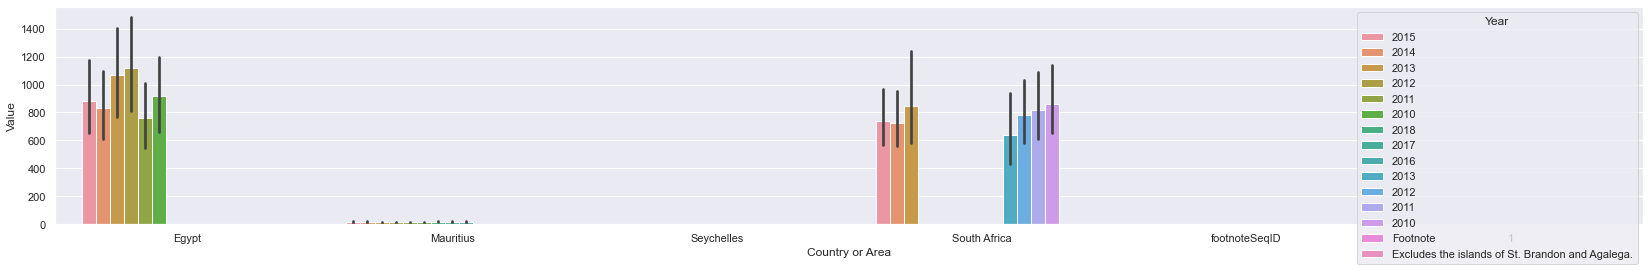

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
deathrow = pd.read_csv('Deaths by cause of death, age and sex (WHO data).csv')
 
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*60+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
 
    
    
    

plt.legend(loc= "upper right")
sns.barplot(deathrow['Country or Area'],deathrow['Value'], deathrow['Year'])


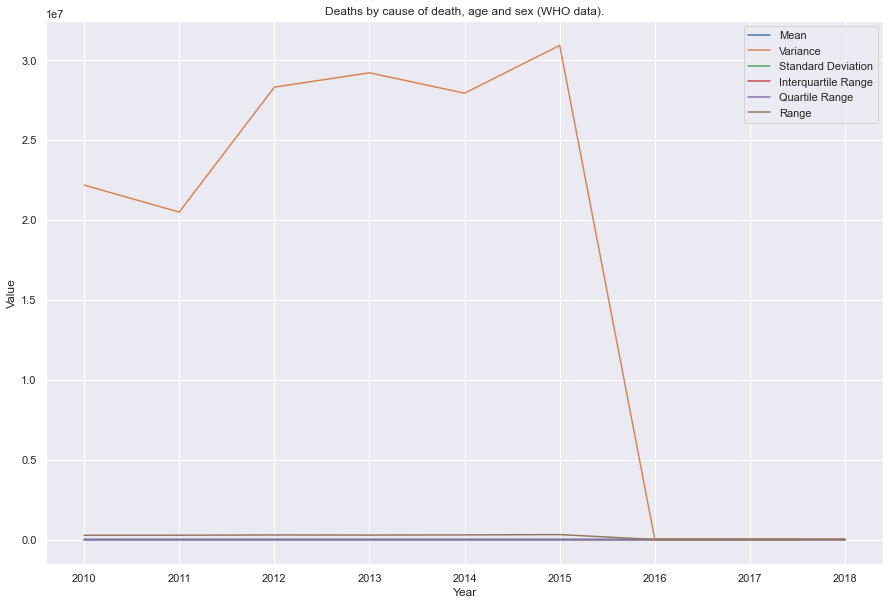

In [33]:
plt.figure(figsize=(15,10))

def interquartile_range(deathrow):
    q3, q1 = np.percentile(deathrow, [75 ,25])
    return q3 - q1

def quartile_range(deathrow):
    q3, q1 = np.percentile(deathrow, [75 ,25])
    return (q3 - q1)/2

def _range(death):
    return death.max() - death.min()

def create_plot(fn, label):
    ls = []
    for year in range(2010,2019):
            ls.append(fn(death[death['Year'] == year]['Value']))
              
                
    plt.plot(range(2010,2019), ls, label=label)
    
    
    plt.title('Deaths by cause of death, age and sex (WHO data).')
    plt.ylabel('Value')
    plt.xlabel('Year')
    
create_plot(statistics.mean, 'Mean')
create_plot(statistics.variance, 'Variance')
create_plot(statistics.stdev, 'Standard Deviation')
create_plot(interquartile_range, 'Interquartile Range')
create_plot(quartile_range, 'Quartile Range')
create_plot(_range, 'Range')

plt.legend(loc='best')